In [1]:
print("Outlaw Architect Lab Online")

Outlaw Architect Lab Online


In [2]:
!pip install pandas lifelines matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4138 sha256=49210ac045547c3741b7455c8ae293ac9a805ede4243da225616fec4683ad335
  Stored in directory: c:\users\divya\appdata\local\pip\cache\wheels\7e\16\46\9477f188924292d3bf1fb8fb42844201591abfc19b7ba6d868
Successfully built autograd-gamma

   -------- ------------------------------- 1/5 [autograd]
   ------------------------ --------------- 3/5 [formulaic]
   ------------------------ --------------- 3/5 [formulaic]
   -------------------------------- ------- 4/5 [lifelines]
   ---------------------------------------- 5/5 [lifelines]



In [3]:
import pandas as pd

# YORK AUDIT DATASET - FULLY POPULATED FROM CLINICAL SUMMARIES
data = {
    'ID': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12'],
    'Age': [71, 68, 65, 74, 62, 70, 69, 77, 64, 58, 79, 66],
    'Sex': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M'],
    'Baseline_Stage': ['cT3N1', 'cT2N1', 'cT3N0', 'cT3N1', 'cT4N2', 'cT3N1', 'cT4N1', 'cT4N2', 'cT3N1', 'cT4N2', 'cT3N1', 'cT3N2'],
    'Preop_Cycles': [4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4],
    'Mandard': ['M2', 'NR', 'M4', 'M5', 'M3', 'M4', 'M4', 'M5', 'M5', 'T4', 'M2', 'M3'],
    'Baseline_Weight': [78.5, 82.1, 71.0, 80.2, 95.0, 81.5, 88.2, 72.5, 85.0, 92.0, 84.5, 112.4],
    'Post_Weight': [77.3, 82.4, 74.0, 78.9, 89.6, 79.5, 82.9, 70.0, 83.2, 96.5, 86.5, 106.1],
    'Height_cm': [178, 174, 179, 177, 180, 177, 177, 173, 176, 172, 180, 183],
    'RDI': [73.9, 72.0, 75.0, 80.0, 100, 60.0, 83.3, 50.0, 63.3, 100, 80.0, 82.5],
    'G3_Toxicity': [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], # 1=Yes, 0=No
    'Survival_Weeks': [65.1, 65.4, 67.4, 64.1, 71.7, 100, 68.0, 36.6, 52.6, 82.7, 87.7, 73.8],
    'Event': [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0] # 1=Death, 0=Alive
}

# Load into DataFrame
df = pd.DataFrame(data)

# --- CALCULATE LBM (Janmahasatian Formula) ---
def calculate_lbm(row):
    h_m = row['Height_cm'] / 100
    w = row['Baseline_Weight']
    w_post = row['Post_Weight']
    if row['Sex'] == 'M':
        lbm_base = (9.27e3 * w) / (6.68e3 + 216 * (w / (h_m**2)))
        lbm_post = (9.27e3 * w_post) / (6.68e3 + 216 * (w_post / (h_m**2)))
    else:
        lbm_base = (9.27e3 * w) / (8.78e3 + 244 * (w / (h_m**2)))
        lbm_post = (9.27e3 * w_post) / (8.78e3 + 244 * (w_post / (h_m**2)))
    return pd.Series([lbm_base, lbm_post])

df[['LBM_Base', 'LBM_Post']] = df.apply(calculate_lbm, axis=1)
df['LBM_Change_Pct'] = ((df['LBM_Post'] - df['LBM_Base']) / df['LBM_Base']) * 100

print("Audit Database structured successfully!")
# Display the full table
df.round(2)

Audit Database structured successfully!


,ID,Age,Sex,Baseline_Stage,Preop_Cycles,Mandard,Baseline_Weight,Post_Weight,Height_cm,RDI,G3_Toxicity,Survival_Weeks,Event,LBM_Base,LBM_Post,LBM_Change_Pct
0,P1,71,M,cT3N1,4,M2,78.5,77.3,178,73.9,0,65.1,0,60.48,59.97,-0.85
1,P2,68,M,cT2N1,4,NR,82.1,82.4,174,72.0,0,65.4,0,60.70,60.82,0.19
2,P3,65,M,cT3N0,4,M4,71.0,74.0,179,75.0,1,67.4,1,57.40,58.79,2.42
3,P4,74,M,cT3N1,4,M5,80.2,78.9,177,80.0,0,64.1,0,60.89,60.35,-0.89
4,P5,62,M,cT4N2,4,M3,95.0,89.6,180,100.0,0,71.7,1,67.67,65.64,-3.00
5,P6,70,M,cT3N1,4,M4,81.5,79.5,177,60.0,1,100.0,0,61.43,60.60,-1.35
6,P7,69,M,cT4N1,4,M4,88.2,82.9,177,83.3,1,68.0,1,64.07,62.00,-3.24
7,P8,77,M,cT4N2,2,M5,72.5,70.0,173,50.0,1,36.6,1,56.42,55.31,-1.96
8,P9,64,M,cT3N1,4,M5,85.0,83.2,176,63.3,0,52.6,1,62.50,61.79,-1.13
9,P10,58,F,cT4N2,4,T4,92.0,96.5,172,100.0,0,82.7,0,52.10,53.44,2.57


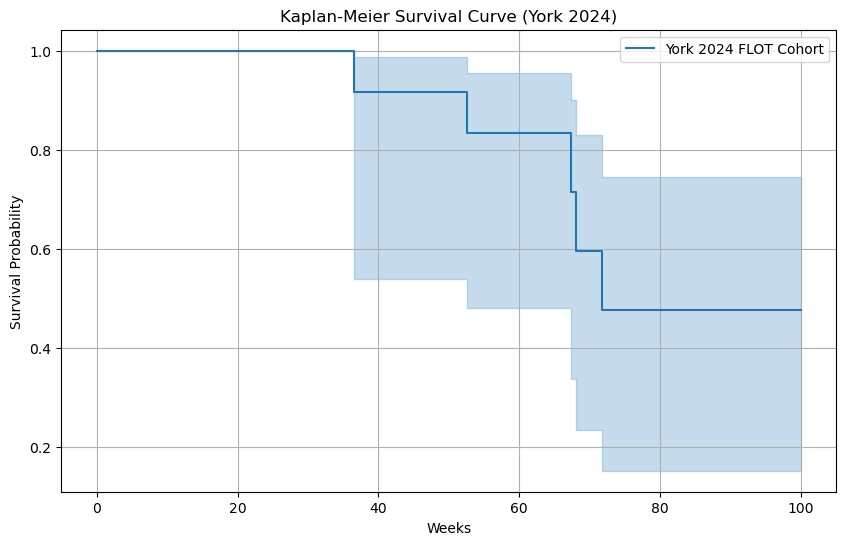

--- Audit Summary Metrics ---
Median Baseline BMI: 26.6 kg/m²
Mean LBM Change: -0.7%
Mean Cohort RDI: 76.7%
Median Survival: 67.7 weeks


In [4]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. Create the Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(df['Survival_Weeks'], event_observed=df['Event'], label='York 2024 FLOT Cohort')

plt.figure(figsize=(10,6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve (York 2024)')
plt.xlabel('Weeks')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# 2. Calculate the Metrics for the Abstract
median_survival = df['Survival_Weeks'].median()
mean_lbm_drop = df['LBM_Change_Pct'].mean()
mean_rdi = df['RDI'].mean()

# Calculate BMI for all
df['BMI_Base'] = df['Baseline_Weight'] / (df['Height_cm']/100)**2
median_bmi = df['BMI_Base'].median()

print("--- Audit Summary Metrics ---")
print(f"Median Baseline BMI: {median_bmi:.1f} kg/m²")
print(f"Mean LBM Change: {mean_lbm_drop:.1f}%")
print(f"Mean Cohort RDI: {mean_rdi:.1f}%")
print(f"Median Survival: {median_survival:.1f} weeks")